In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning

In [24]:
df = pd.read_csv('../model/msl_2.csv')
df.columns = [i for i in range(df.shape[1])]
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.369335,0.647290,-8.067596e-07,0.458756,0.517023,-0.132100,0.510993,0.386397,-0.230060,0.504471,...,0.627988,0.810978,-0.285730,0.618294,0.792044,-0.272865,0.548572,0.784525,-0.269824,A
1,0.447902,0.631261,-1.447690e-06,0.481651,0.462282,-0.122120,0.578482,0.326013,-0.203820,0.682282,...,0.264022,0.623149,-0.344500,0.276682,0.625128,-0.336895,0.346957,0.645216,-0.326634,A
2,0.338024,0.714470,-1.904026e-07,0.485743,0.570132,-0.088886,0.599837,0.397358,-0.244699,0.651439,...,0.394324,0.944267,-0.579821,0.385576,0.889033,-0.529616,0.313195,0.792430,-0.489469,A
3,0.517010,0.613824,-1.326411e-06,0.471322,0.445583,-0.157907,0.477201,0.281772,-0.284943,0.519002,...,0.343259,0.748896,-0.518572,0.367515,0.730712,-0.500018,0.474312,0.714778,-0.469345,A
4,0.808943,0.648379,-4.532018e-07,0.661624,0.506410,-0.005043,0.435882,0.407196,-0.065620,0.300152,...,0.409848,0.886582,-0.376101,0.448808,0.852764,-0.338099,0.539523,0.810555,-0.303243,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.328290,0.803496,-1.312512e-06,0.257831,0.651052,-0.027211,0.263290,0.474234,-0.047664,0.257895,...,0.835807,0.547742,-0.098526,0.907416,0.494305,-0.113028,0.970328,0.440646,-0.112874,Y
2954,0.473017,0.787159,-3.057600e-07,0.660243,0.702658,-0.058579,0.815188,0.574132,-0.081791,0.953984,...,0.325057,0.315308,-0.129142,0.389099,0.392316,-0.128062,0.440733,0.471492,-0.115059,Y
2955,0.299532,0.809474,-1.402220e-06,0.233422,0.611957,-0.038041,0.268780,0.388602,-0.059974,0.289654,...,0.973316,0.586969,-0.115857,1.080203,0.540434,-0.136471,1.177144,0.493959,-0.134327,Y
2956,0.473915,0.806739,-7.144734e-07,0.635815,0.734635,-0.080688,0.774366,0.589705,-0.131136,0.921151,...,0.200937,0.321410,-0.182344,0.144471,0.247892,-0.208217,0.098911,0.169719,-0.221961,Y


In [25]:
print("Uncleaned dataset shape =", df.shape)

Uncleaned dataset shape = (2958, 64)


In [26]:
# removing null values from our dataset

all_null_values = df[df.iloc[:, 0] == 0]
print("Number of null values =", len(all_null_values.index))

Number of null values = 0


In [27]:
# dropping those null values from our dataset

df.drop(all_null_values.index, inplace=True)

In [28]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.369335,0.647290,-8.067596e-07,0.458756,0.517023,-0.132100,0.510993,0.386397,-0.230060,0.504471,...,0.627988,0.810978,-0.285730,0.618294,0.792044,-0.272865,0.548572,0.784525,-0.269824,A
1,0.447902,0.631261,-1.447690e-06,0.481651,0.462282,-0.122120,0.578482,0.326013,-0.203820,0.682282,...,0.264022,0.623149,-0.344500,0.276682,0.625128,-0.336895,0.346957,0.645216,-0.326634,A
2,0.338024,0.714470,-1.904026e-07,0.485743,0.570132,-0.088886,0.599837,0.397358,-0.244699,0.651439,...,0.394324,0.944267,-0.579821,0.385576,0.889033,-0.529616,0.313195,0.792430,-0.489469,A
3,0.517010,0.613824,-1.326411e-06,0.471322,0.445583,-0.157907,0.477201,0.281772,-0.284943,0.519002,...,0.343259,0.748896,-0.518572,0.367515,0.730712,-0.500018,0.474312,0.714778,-0.469345,A
4,0.808943,0.648379,-4.532018e-07,0.661624,0.506410,-0.005043,0.435882,0.407196,-0.065620,0.300152,...,0.409848,0.886582,-0.376101,0.448808,0.852764,-0.338099,0.539523,0.810555,-0.303243,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2953,0.328290,0.803496,-1.312512e-06,0.257831,0.651052,-0.027211,0.263290,0.474234,-0.047664,0.257895,...,0.835807,0.547742,-0.098526,0.907416,0.494305,-0.113028,0.970328,0.440646,-0.112874,Y
2954,0.473017,0.787159,-3.057600e-07,0.660243,0.702658,-0.058579,0.815188,0.574132,-0.081791,0.953984,...,0.325057,0.315308,-0.129142,0.389099,0.392316,-0.128062,0.440733,0.471492,-0.115059,Y
2955,0.299532,0.809474,-1.402220e-06,0.233422,0.611957,-0.038041,0.268780,0.388602,-0.059974,0.289654,...,0.973316,0.586969,-0.115857,1.080203,0.540434,-0.136471,1.177144,0.493959,-0.134327,Y
2956,0.473915,0.806739,-7.144734e-07,0.635815,0.734635,-0.080688,0.774366,0.589705,-0.131136,0.921151,...,0.200937,0.321410,-0.182344,0.144471,0.247892,-0.208217,0.098911,0.169719,-0.221961,Y


In [29]:
print("Cleaned dataset shape =", df.shape)

Cleaned dataset shape = (2958, 64)


## Data Preparation

In [30]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (2958, 63)
Labels shape = (2958,)


## Data Split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Model Making

In [32]:
svm = SVC(C=100, gamma=0.1, kernel='rbf')

In [33]:
svm.fit(x_train, y_train)

SVC(C=100, gamma=0.1)

In [34]:
print("Training score =", svm.score(x_train, y_train))

Training score = 0.9801352493660186


In [35]:
y_pred = svm.predict(x_test)

In [36]:
print("Testing score =", accuracy_score(y_test, y_pred))

Testing score = 0.9847972972972973


## Visualization

In [37]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')

In [38]:
f1, recall, precision

(0.9847972972972973, 0.9847972972972973, 0.9847972972972973)

<AxesSubplot:title={'center':'Confusion Matrix - American Sign Language'}>

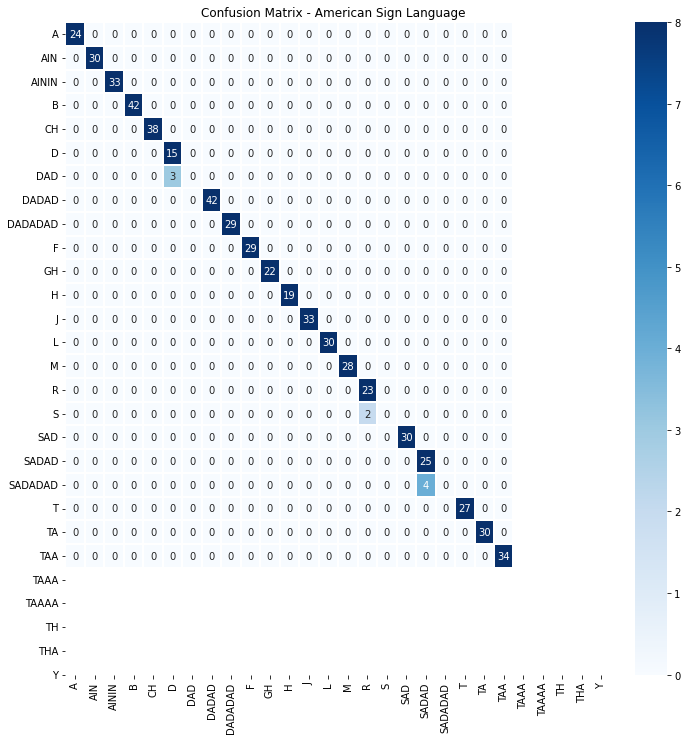

In [39]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [40]:
maping.figure.savefig("msl_output_13.png")

In [41]:
import joblib

In [42]:

joblib.dump(svm, "../model/msl_model_2.pkl")

['../model/msl_model_2.pkl']